In [2]:
countries = (["India", "UK"])
capitals = (["New Delhi", "London"])

In [3]:
#d = dict(zip(countries , capitals))

In [4]:
type(d)

NameError: name 'd' is not defined

In [5]:
d

NameError: name 'd' is not defined

In [6]:
import numpy as np

In [7]:
arr = np.asarray([[1, 2, 3],[4, 5, 6],[7, 8, 9]], dtype = np.float64)
arr.shape

(3, 3)

In [8]:
import matplotlib.pyplot as plt

In [9]:
x = np.asarray([1, 2, 3, 4, 5 ])
y = np.asarray([5, 6, 7, 8, 5 ])

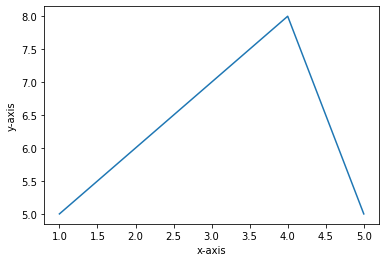

In [10]:
plt.plot(x, y)
plt.xlabel("x-axis")
plt.ylabel('y-axis')
plt.show()

In [11]:
import pandas as pd

In [12]:
df = pd.read_csv("movie_metadata.csv")

FileNotFoundError: [Errno 2] File b'movie_metadata.csv' does not exist: b'movie_metadata.csv'

In [ ]:
df.head()

In [ ]:
title = np.asarray(df.movie_title)

In [13]:
title_length = list()
for each in title:
    title_length.append(len(each))

NameError: name 'title' is not defined

In [14]:
title_dict = dict()
for each in title_length:
    if each in title_dict:
        title_dict[each] += 1
    else:
        title_dict[each] = 1

In [15]:
plt.plot?

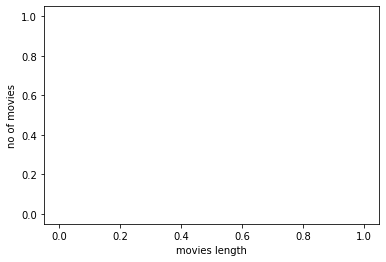

In [16]:
plt.plot(list(title_dict.keys()), list(title_dict.values()))
plt.xlabel("movies length")
plt.ylabel("no of movies")
plt.show()

In [17]:
np.mean(list(title_dict.values()))

/home/macab/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/macab/.local/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

In [18]:
np.mean(np.array(title_length))

nan

In [19]:
np.mean(list(title_dict.keys()))

nan

In [20]:
plt.hist?

In [21]:
arr = np.random.randn(1000)

In [22]:
arr

array([-1.41975661e+00,  3.28837339e-01, -2.87884654e-01, -1.20060775e+00,
       -2.06371385e+00,  8.88963942e-01,  5.95490882e-01, -1.45295866e+00,
       -6.84979348e-01,  3.88541262e-01,  2.10365630e-01,  2.44833935e+00,
       -1.07006145e+00,  1.88711596e+00,  6.63485109e-01,  2.20390611e-01,
       -1.66563610e-01,  3.27507357e-01,  1.15785032e+00, -1.71323833e+00,
        6.84298390e-01,  1.33051293e+00,  6.57472626e-01,  7.88276561e-01,
       -9.16761932e-01,  7.11655897e-01,  1.04454853e+00, -2.62756662e-01,
       -3.89295783e-01, -5.65542136e-01,  1.40733286e+00, -1.47964516e-01,
       -7.19635184e-02,  1.16752279e+00, -3.50760505e-01,  4.55070067e-01,
       -1.58623786e+00, -4.94964014e-01, -6.70928914e-01,  5.20899820e-01,
       -8.38005611e-01, -3.08879788e-01,  3.90959935e-02,  3.46474872e-01,
        1.65652059e+00, -2.12929334e-02,  1.81198989e+00,  1.80200629e+00,
       -4.58983041e-01, -1.50235727e+00, -3.22914790e-01,  5.72571520e-01,
       -1.31890804e+00, -

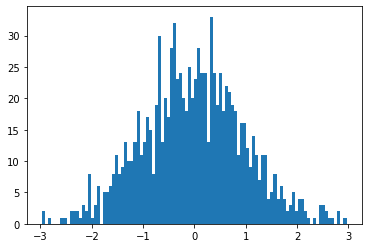

In [23]:
plt.hist(arr, bins = 100)
plt.show()

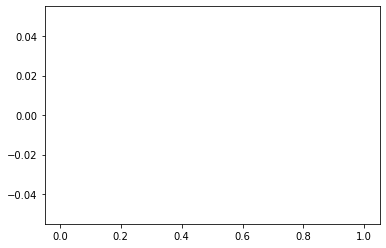

In [24]:
plt.hist(title_length, bins = 40)
plt.show()

In [25]:
marks = np.random.randn(100)*10 + 60

In [26]:
np.std(marks)

10.169286379157164

In [27]:
np.mean(marks)

59.422606153047

In [28]:
base_marks = [(each - 60)/10 for each in marks]

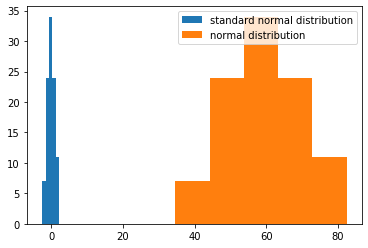

In [29]:
plt.hist(base_marks, bins = 5, label = "standard normal distribution")
plt.hist(marks, bins = 5, label = "normal distribution")
plt.legend()
plt.show()

In [30]:
plt.hist?

# multivriate normal distribution
## 1 - orange
## 0 - apple

In [138]:
apple_data = np.random.multivariate_normal(mean = [6, 5], cov = [[1, 0.2], [0.2, 1]], size = 1000)
orange_data = np.random.multivariate_normal(mean = [6, 9], cov = [[1, -0.2], [-0.2, 1]], size = 1000)

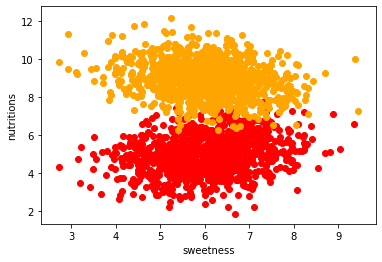

In [139]:
plt.scatter(apple_data[:, 0], apple_data[:, 1], c = "red")
plt.scatter(orange_data[:, 0], orange_data[:, 1], c = "orange")

plt.xlabel("sweetness")
plt.ylabel("nutritions")
plt.show()

## KNN
#### data prep

In [140]:
total_fruits = apple_data.shape[0] + orange_data.shape[0]

In [141]:
print(total_fruits)

2000


In [142]:
x = np.zeros((total_fruits, 3))

In [143]:
x[:1000, :-1] = apple_data
x[1000:, :-1] = orange_data

In [144]:
x[1000:, -1] = 1

In [145]:
X = x[:, :-1]
Y = x[:, -1]

In [146]:
def distance(p1, p2):
    return np.sum((p2 - p1)**2)**.5

In [149]:
def knn(X, Y, test, k = 5):
    m = X.shape[0]
    l = []
    for i in range(m):
        l.append((distance(test, X[i]), Y[i]))
        
    # sort the distance and take the second col(labels)
    l = np.array(sorted(l))[:, 1]
    
    # take the K nearest points here top five will be k-nearest becuase l is sorted
    l = l[:k]
    
    
    # see the freq. of each unique values here t will be  2D numpy array having unique values and their respective freq. 
    t = np.unique(l, return_counts = True)
    
  
    # check the max freq in freq array
    idx = np.argmax(t[1])
    
    # make prediction in t which has label and their freq.
    pred = int(t[0][idx])
    
    if pred == 0:
        print("apple")
    else:
        print("orange")
        
    return t
    
    
    
    

In [150]:

knn(X, Y, np.array([8, 6.5]))

apple


(array([0., 1.]), array([4, 1]))